<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np 
from sklearn.linear_model import LinearRegression

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [7]:
del boston_df['Unnamed: 0']

In [8]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [9]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [10]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

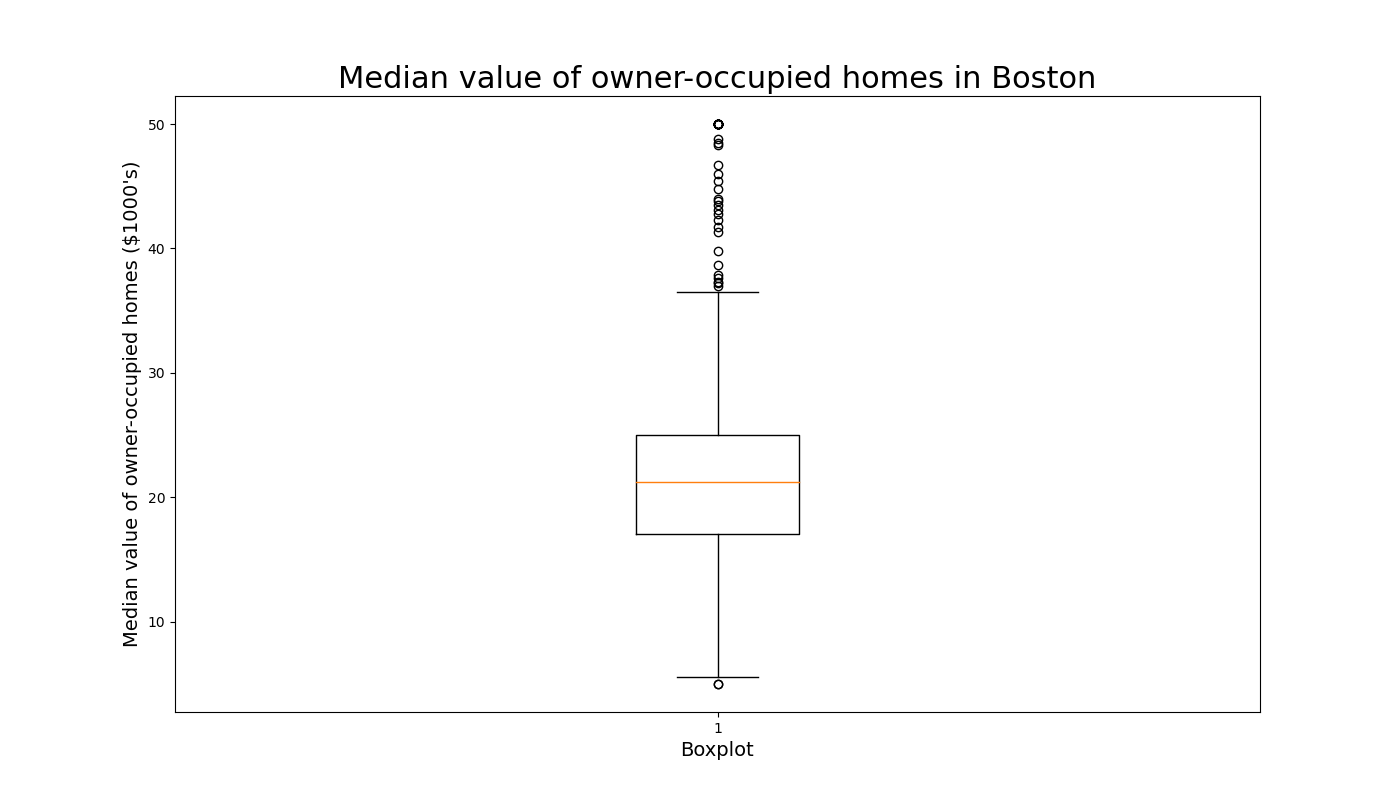

<Figure size 1400x800 with 0 Axes>

In [11]:
#1.1 For the "Median value of owner-occupied homes" provide a boxplot</b>



get_ipython().run_line_magic('matplotlib', 'inline')

plt.figure(figsize = (14, 8))
plt.boxplot("MEDV", data = boston_df)
plt.xlabel("Boxplot", fontsize = 14) 
plt.ylabel("Median value of owner-occupied homes ($1000's)", fontsize = 14)
plt.title("Median value of owner-occupied homes in Boston", fontsize = 22)
plt.show()

Note: Majority tracts don't bound Charles River

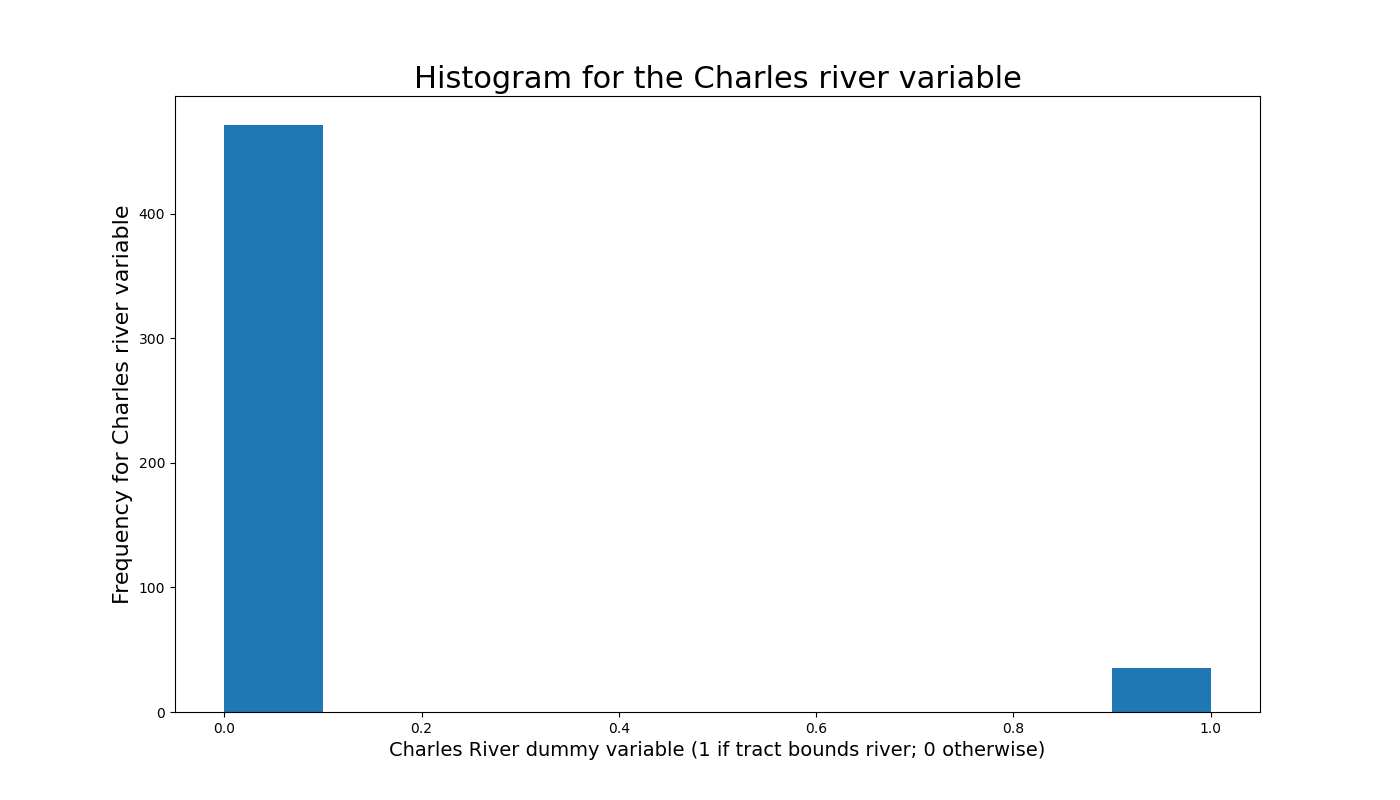

<Figure size 1400x800 with 0 Axes>

In [30]:
get_ipython().run_line_magic('matplotlib', 'inline')

plt.figure(figsize = (14,8))
plt.hist("CHAS", data = boston_df)
plt.title("Histogram for the Charles river variable", fontsize = 22)
plt.xlabel("Charles River dummy variable (1 if tract bounds river; 0 otherwise)", fontsize = 14) 
plt.ylabel("Frequency for Charles river variable", fontsize = 16)

plt.show()

In [13]:
# <b> 1.3 Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)</b>

boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

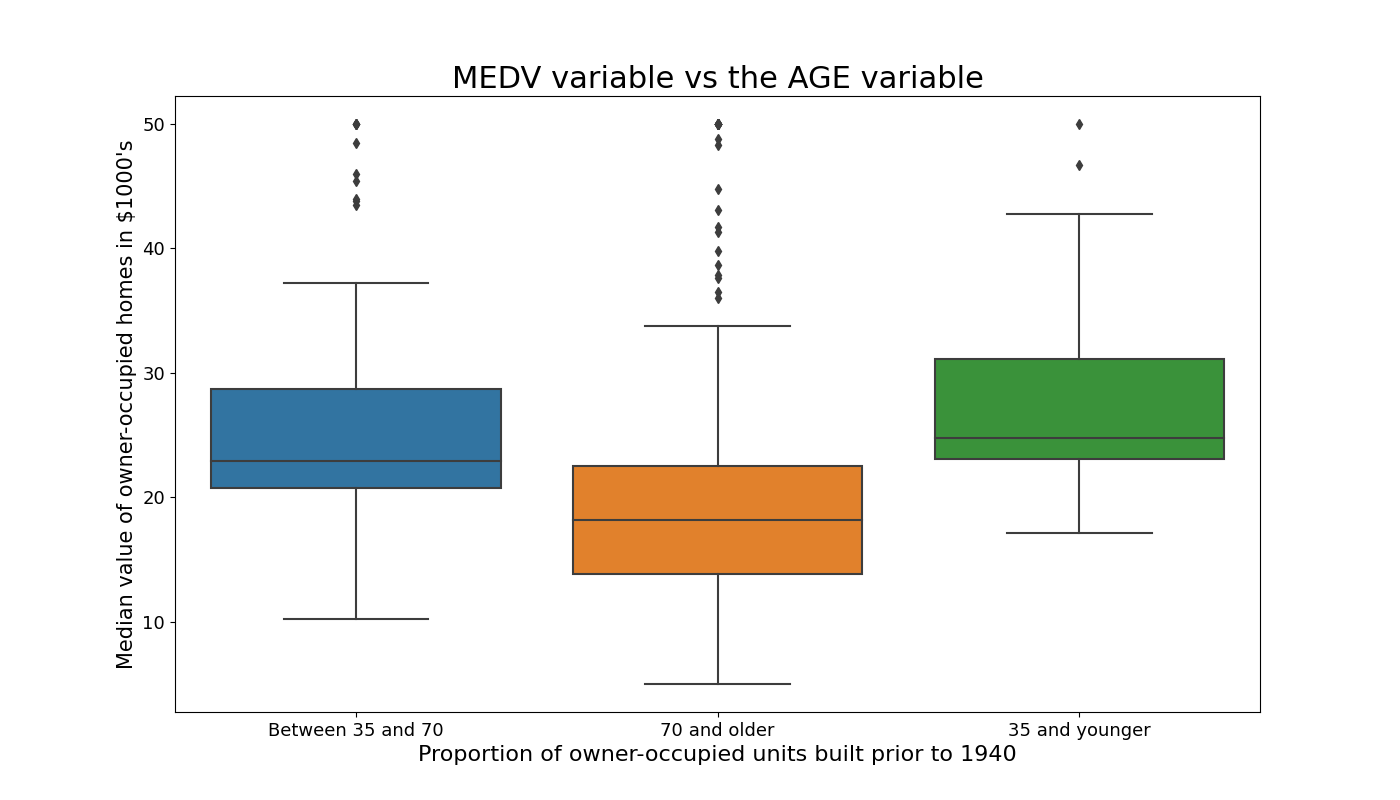

<Figure size 1400x800 with 0 Axes>

In [14]:
plt.figure(figsize=(14, 8))
box = sns.boxplot(x = 'Age_Group', y = 'MEDV', data = boston_df)
box.set_title("MEDV variable vs the AGE variable", fontsize = 22)
box.set_xlabel("Proportion of owner-occupied units built prior to 1940", fontsize = 16)
box.set_ylabel("Median value of owner-occupied homes in $1000's", fontsize = 15)
box.tick_params(labelsize=13)

plt.show()

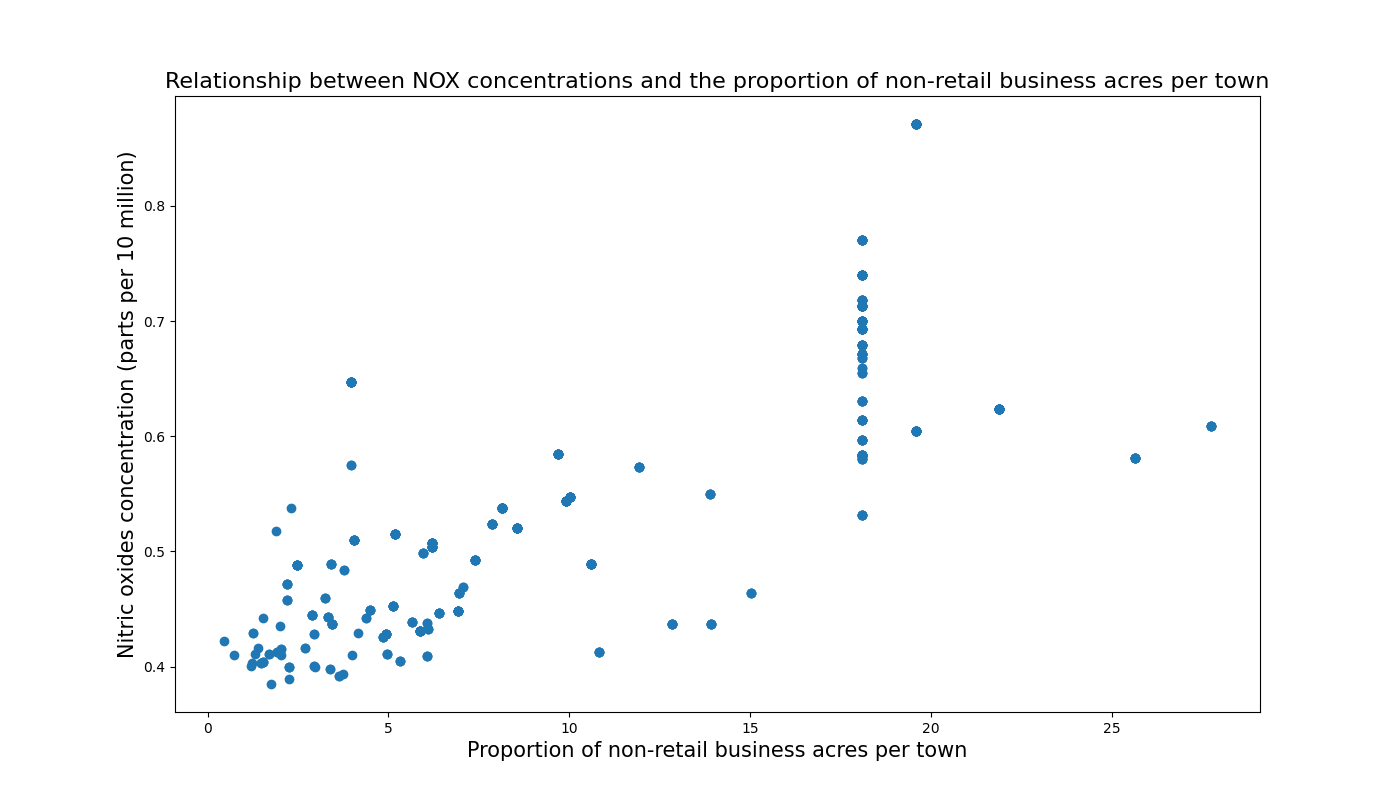

<Figure size 1400x800 with 0 Axes>

In [15]:
get_ipython().run_line_magic('matplotlib', 'inline')

plt.figure(figsize=(14,8))
plt.scatter(x = "INDUS", y = "NOX", data = boston_df)
plt.title("Relationship between NOX concentrations and the proportion of non-retail business acres per town", fontsize = 16)
plt.xlabel("Proportion of non-retail business acres per town", fontsize = 15)
plt.ylabel("Nitric oxides concentration (parts per 10 million)", fontsize = 15)


plt.show()

 Answer: As we can see on the plot above there is a positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town as there is a linear relationship between both variables. I will add below a linear regression line to the plot to make it easier to see this positive correlation.

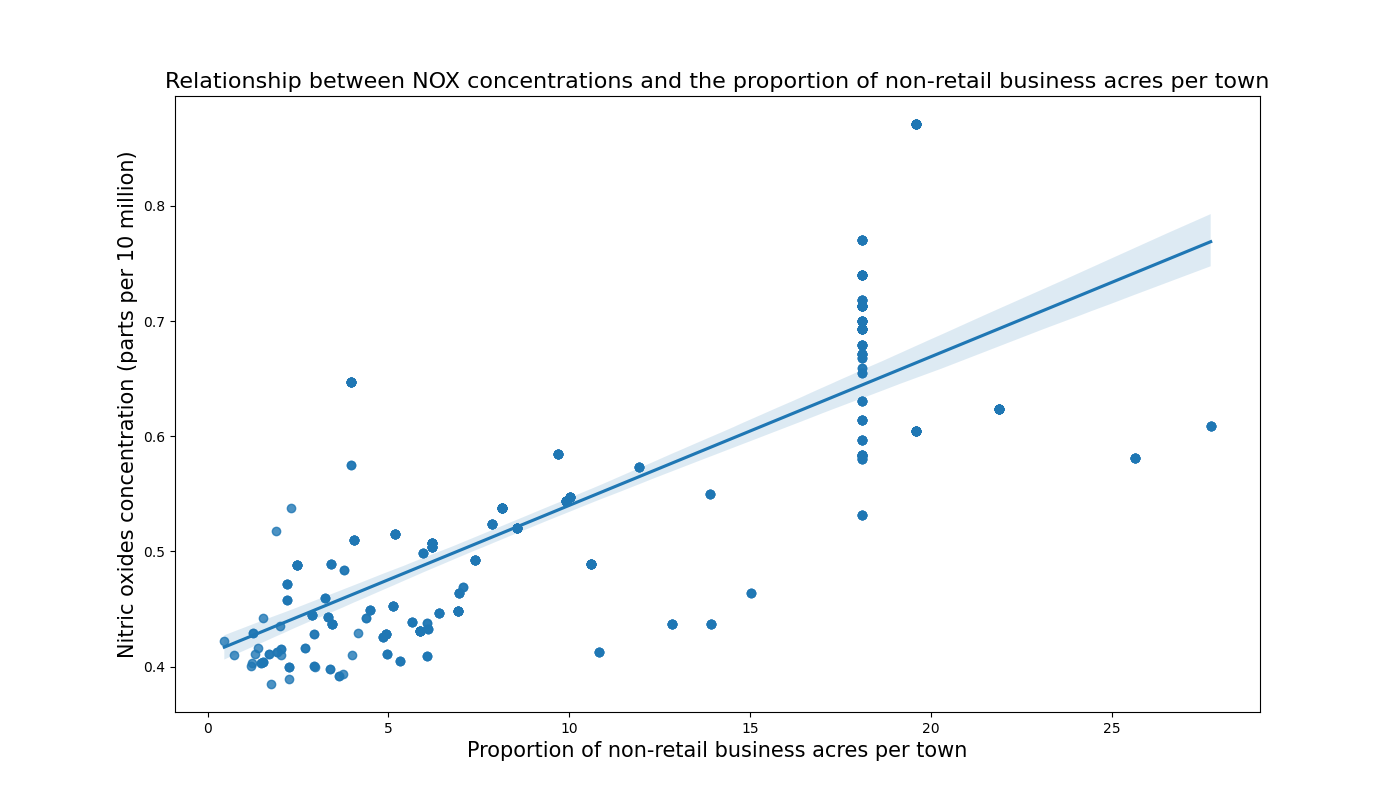

<Figure size 1400x800 with 0 Axes>

In [16]:
X = boston_df[['INDUS']]
Y = boston_df['NOX']

lm = LinearRegression()

lm.fit(X, Y)

predic = lm.predict(X)

plt.figure(figsize=(14,8))
plot = sns.regplot(x = "INDUS", y = "NOX", data = boston_df)
plot.set_title("Relationship between NOX concentrations and the proportion of non-retail business acres per town", fontsize = 16)
plot.set_xlabel("Proportion of non-retail business acres per town", fontsize = 15)
plot.set_ylabel("Nitric oxides concentration (parts per 10 million)", fontsize = 15)

plt.show()

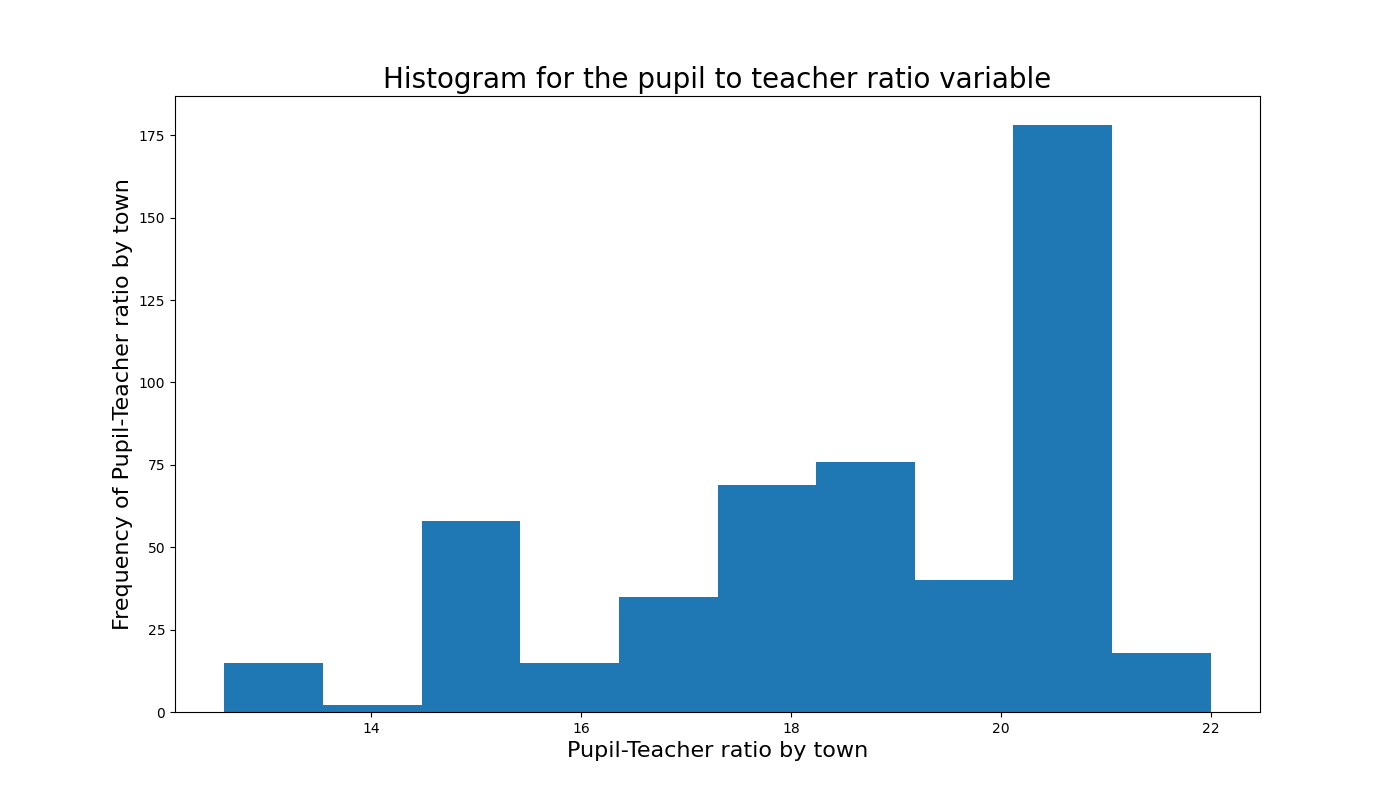

<Figure size 1400x800 with 0 Axes>

In [17]:
get_ipython().run_line_magic('matplotlib', 'inline')

plt.figure(figsize=(14,8))
plt.hist("PTRATIO", data=boston_df)
plt.title("Histogram for the pupil to teacher ratio variable", fontsize = 20)
plt.xlabel("Pupil-Teacher ratio by town", fontsize = 16)
plt.ylabel("Frequency of Pupil-Teacher ratio by town", fontsize = 16)

plt.show()

# H0:µ1=µ2  ("there is no difference in median value of houses bounded by the Charles river")

# H1:µ1≠µ2 ("there is a difference in median value of houses bounded by the Charles river")

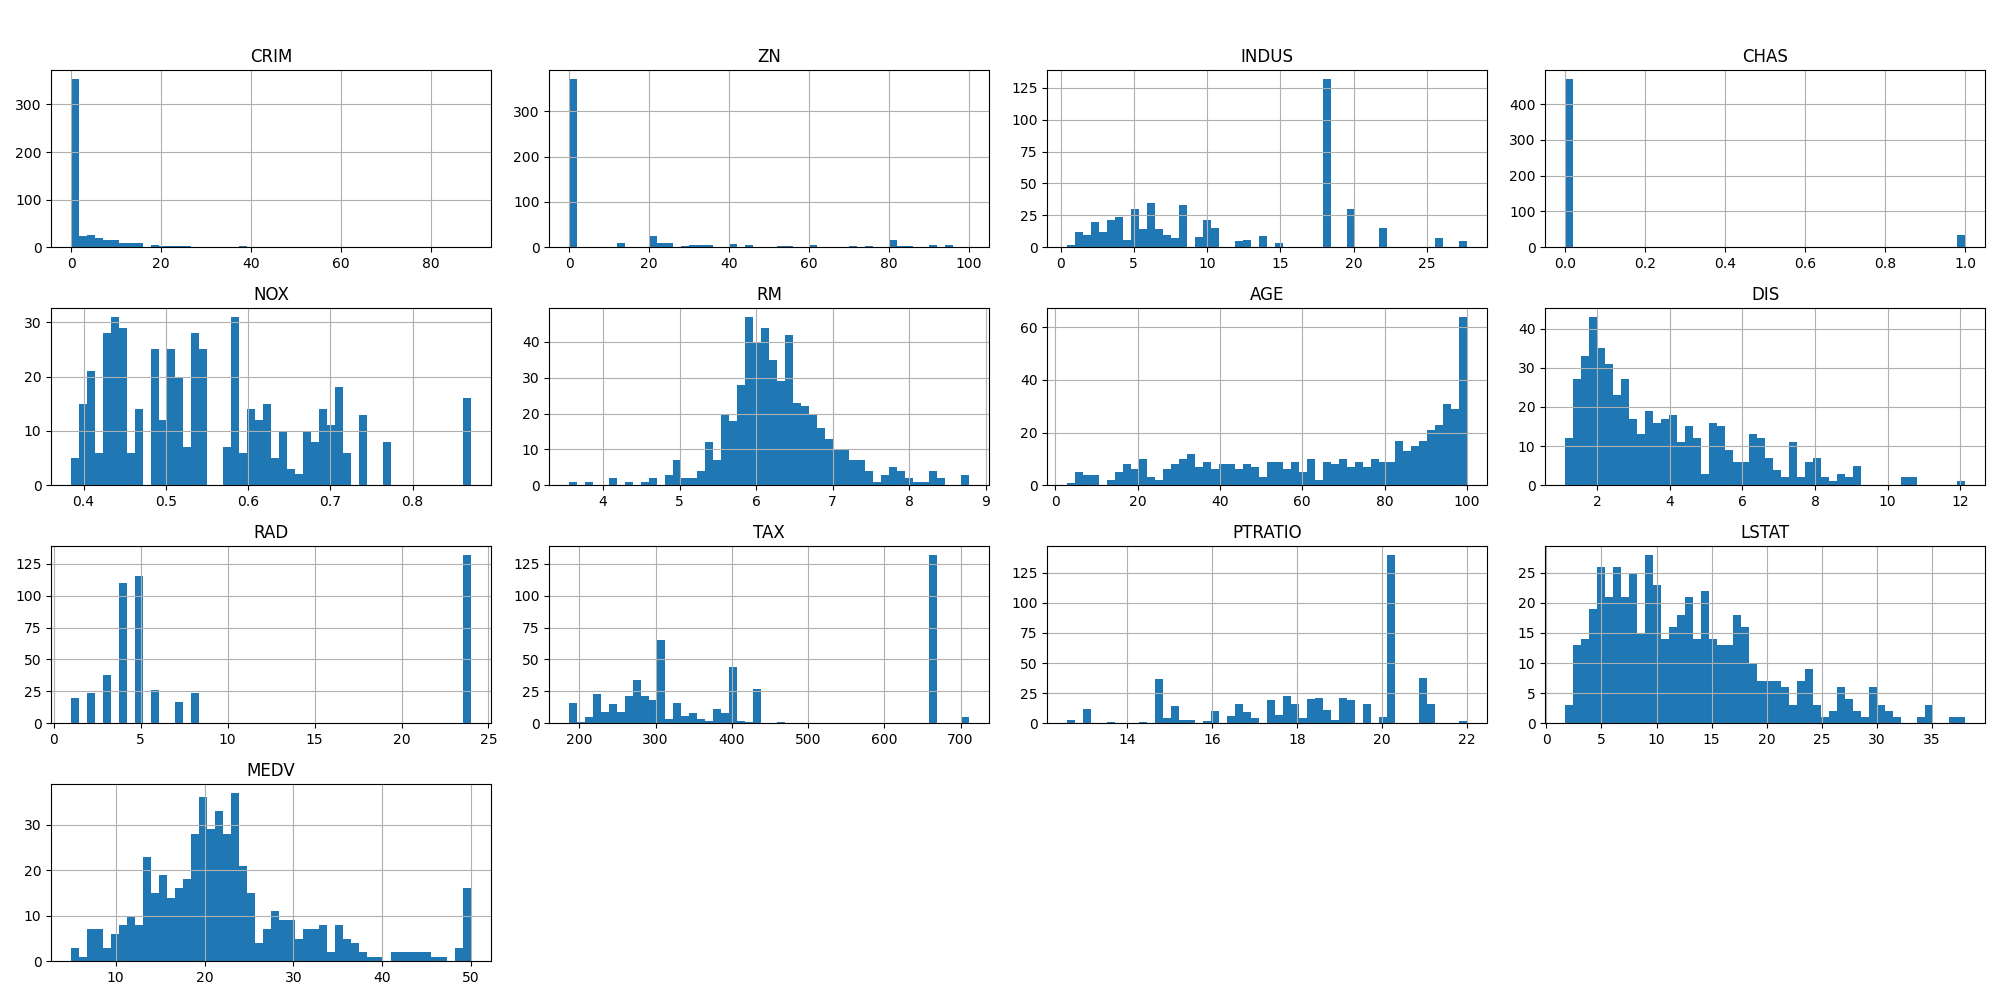

<Figure size 2000x1000 with 0 Axes>

In [25]:
boston_df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

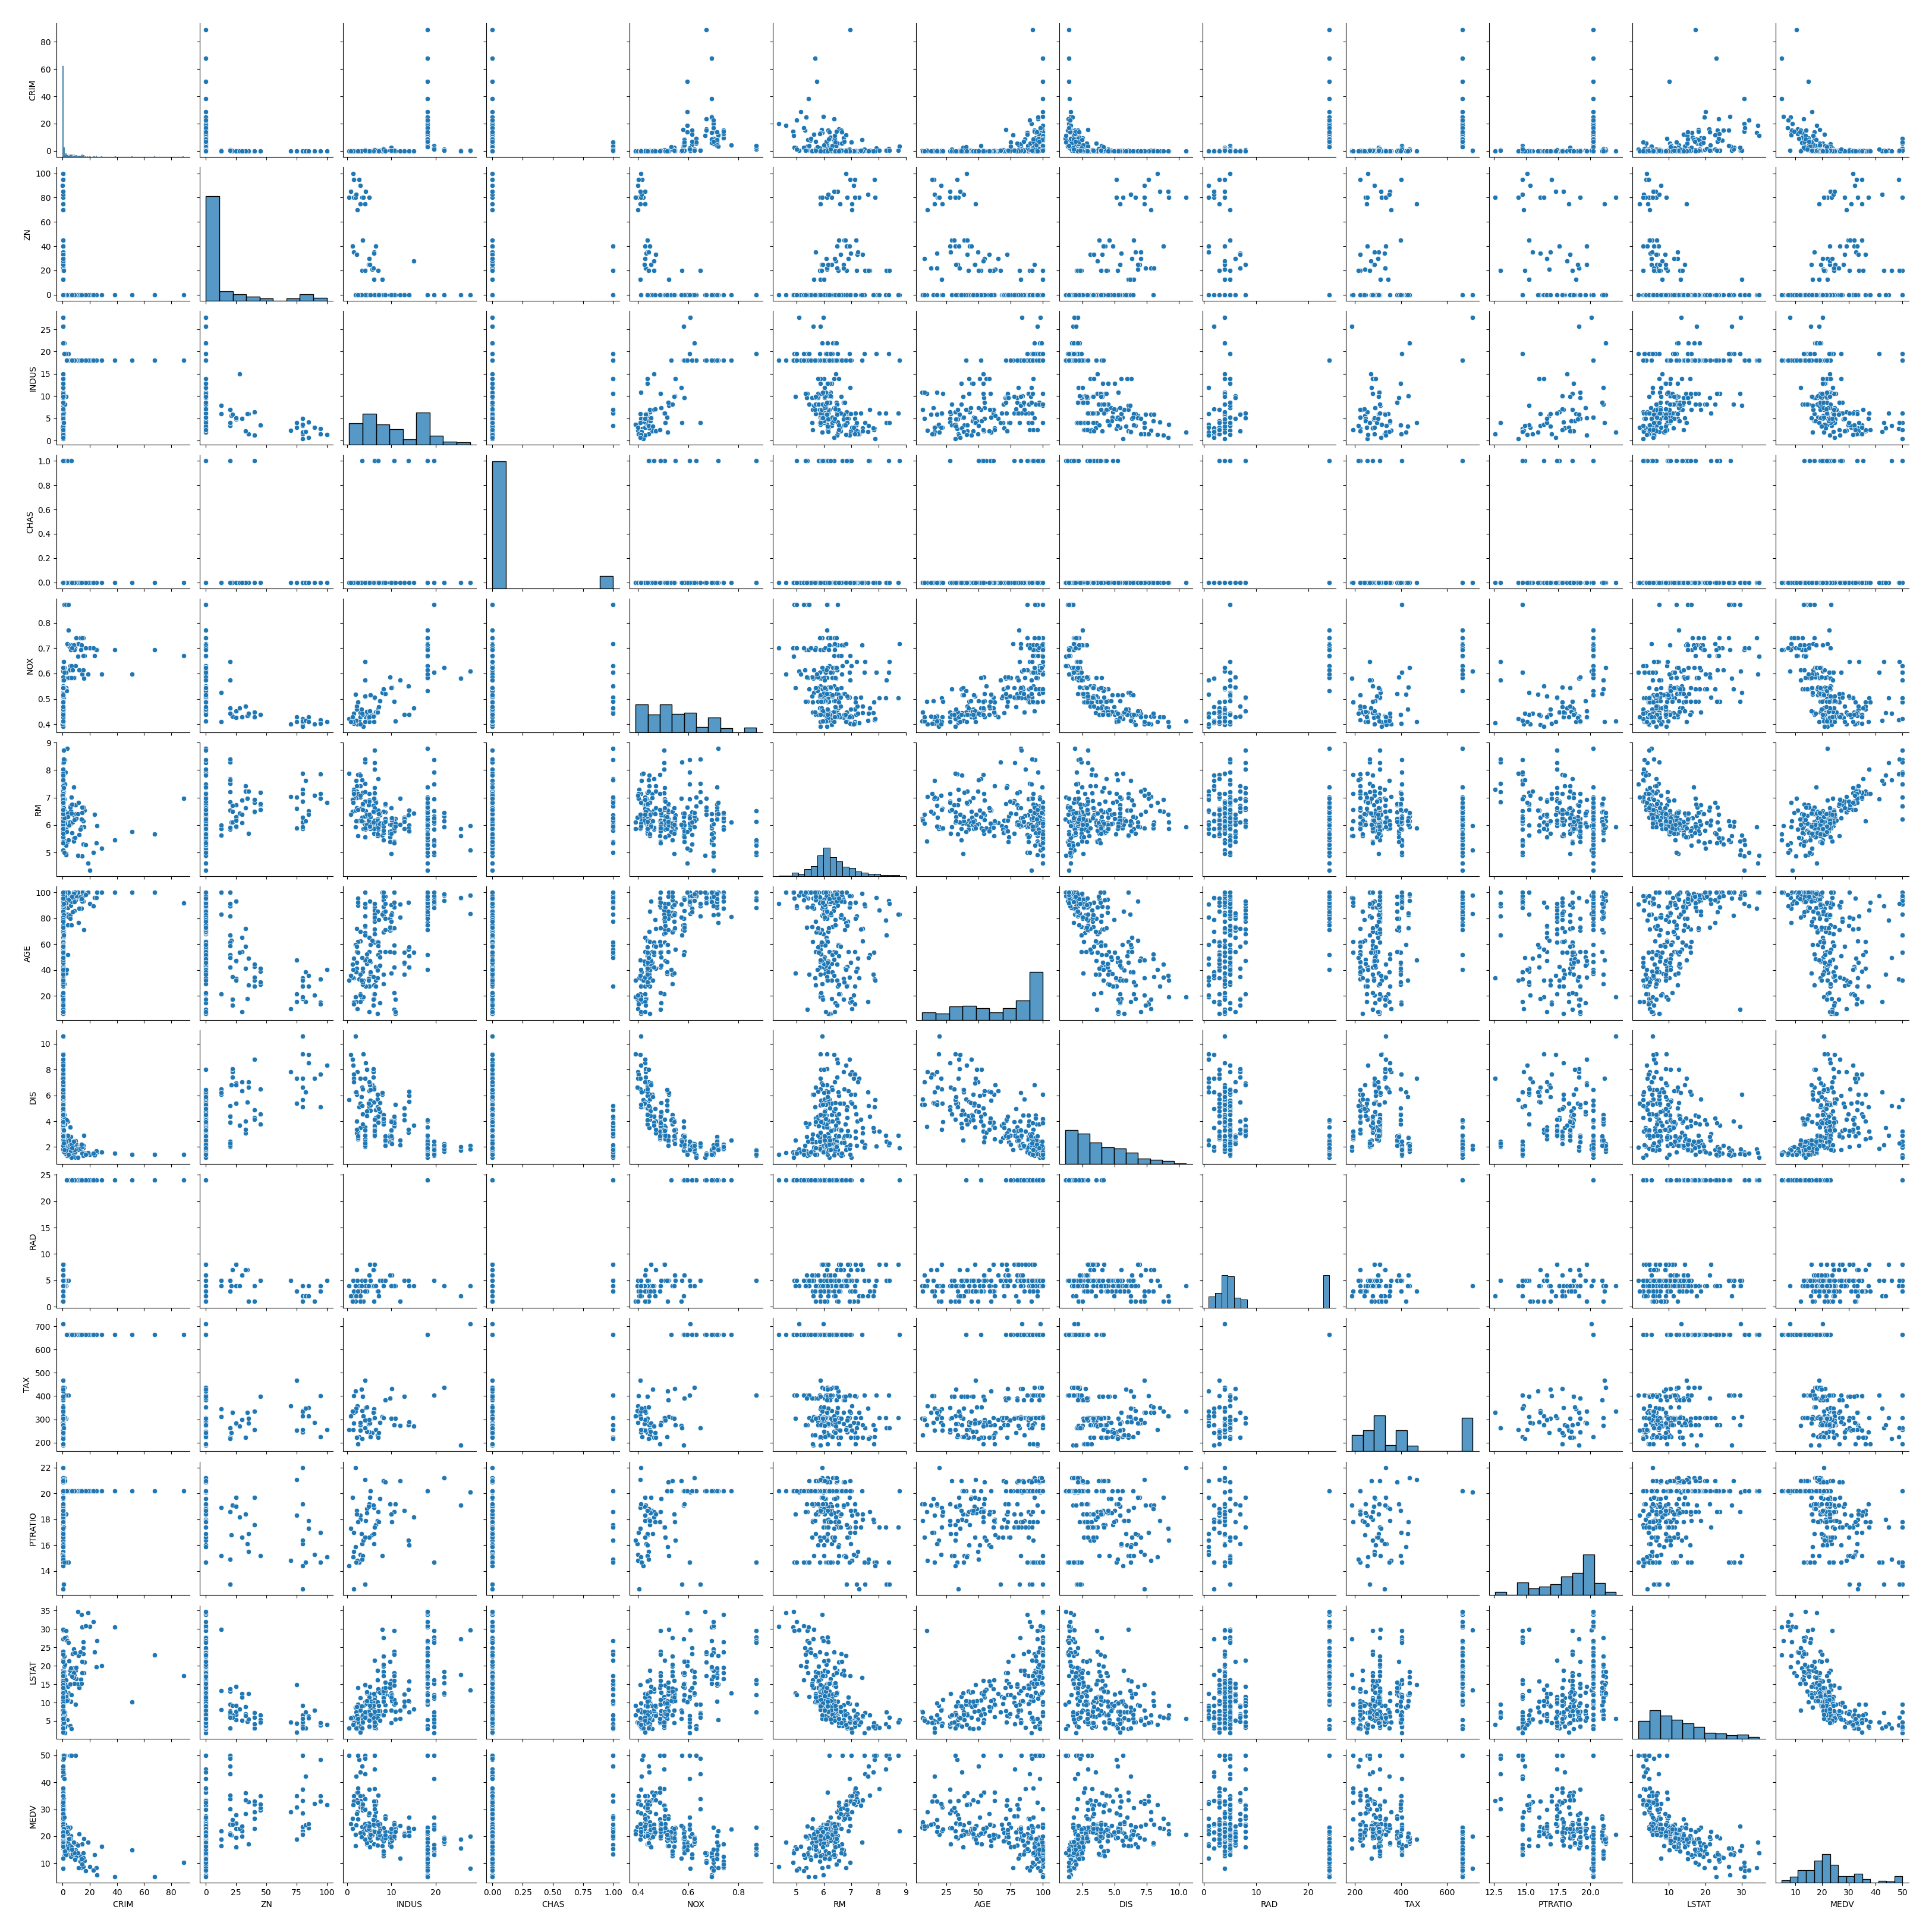

<Figure size 2000x2000 with 0 Axes>

<Figure size 3250x3250 with 0 Axes>

In [26]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(boston_df.sample(250))
plt.show()

In [20]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

# H0: µ1=µ2=µ3  (all means are equal)

# H1:  At least one mean is different

In [21]:
first = boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV']
second = boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV']
third = boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV']

scipy.stats.f_oneway(first, second, third)

F_onewayResult(statistic=34.249179272635395, pvalue=1.135217093487225e-14)

# The null hypothesis is rejected because the p-value is less than the alpha value of 0.05 and that means there is a statistical difference in Median values of houses for each proportion of owner-occupied units built before 1940. We can see it clearly in the plot below.

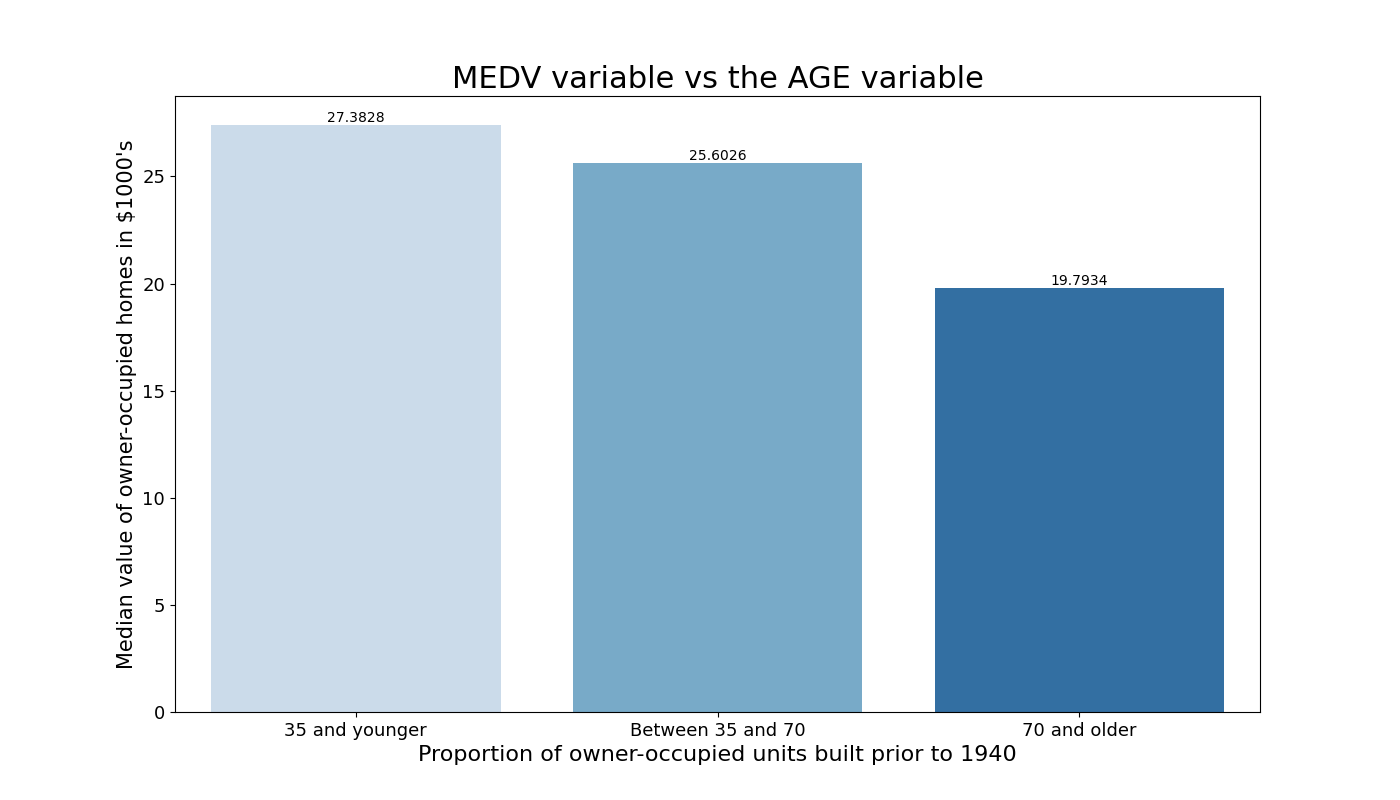

<Figure size 1400x800 with 0 Axes>

In [27]:
order_list = ["35 and younger", "Between 35 and 70", "70 and older"]

plt.figure(figsize=(14, 8))
b = sns.barplot(x = "Age_Group", y = 'MEDV', data=boston_df, palette="Blues", errorbar=None, order=order_list)
b.set_title("MEDV variable vs the AGE variable", fontsize = 22)
b.set_xlabel("Proportion of owner-occupied units built prior to 1940", fontsize = 16)
b.set_ylabel("Median value of owner-occupied homes in $1000's", fontsize = 15)
b.tick_params(labelsize=13)
b.bar_label(b.containers[0])
plt.show()

2.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# My hypothesis:
H0:  There is no relationship between NOX concentrations and proportion of non-retail business acres per town

H1:  There is a relationship between NOX concentrations and proportion of non-retail business acres per town

In [23]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209189, 7.913361061211254e-98)

# Answer: The null hypothesis is rejected because the p-value is less than the alpha value of 0.05 and that means there is a statistical relationship between NOX concentrations and proportion of non-retail business acres per town.

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)</b>
 
# My hypothesis:
# H0:β1  = 0 (No impact between both variables)
# H1:β1 ≠ 0 (There is an impact netween both variables)

In [24]:
axis_x = boston_df['DIS']
axis_y = boston_df['MEDV']

axis_x = sm.add_constant(axis_x) 

finds = sm.OLS(axis_y, axis_x).fit()
pred = finds.predict(axis_x)

finds.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.21e-08
Time:                        16:23:35   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The null hypothesis is rejected because the p-value is less than the alpha value of 0.05 and that means there is a positive impact (coeficient of 1.0916) of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.